<a href="https://colab.research.google.com/github/tensorflow-project/FineTuning/blob/main/two_concepts/image_generation_two_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tensorflow-project/FineTuning

Cloning into 'FineTuning'...
remote: Enumerating objects: 885, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 885 (delta 125), reused 39 (delta 39), pack-reused 732
Receiving objects: 100% (885/885), 133.40 MiB | 15.83 MiB/s, done.
Resolving deltas: 100% (634/634), done.


In [2]:
import sys
import os
import numpy as np
from google.colab import drive
import urllib.request

py_file_location = "/content/FineTuning/two_concepts"
sys.path.append(os.path.abspath(py_file_location))
py_file_location = "/content/FineTuning/models"
sys.path.append(os.path.abspath(py_file_location))

import textual_inversion_two_concepts as txt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
13911/13911 [==============================] - 0s 1us/step


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


136824240/136824240 [==============================] - 2s 0us/step


In [3]:
### load stable diffusion class and placeholder tokens from textual_inversion.py
stable_diffusion = txt.stable_diffusion
placeholder_token_broccoli = txt.placeholder_token_broccoli
placeholder_token_emoji = txt.placeholder_token_emoji
placeholder_token_combined = txt.placeholder_token_combined

In [38]:


### Replace <file_id> and <file_name> with the ID and name of your file

### The file id is the string of characters between "s/" and the next slash "/"
### example: https://www.dropbox.com/s/yttja9ihaoq2xhd/35epochs_weights_with_two_concepts.npy?dl=0
file_id = 'yttja9ihaoq2xhd'

### name óf file
file_name = '35epochs_weights_with_two_concepts.npy'

url = f'https://www.dropbox.com/s/{file_id}/{file_name}?dl=1'
filename = f'{file_name}.npy'

### Download the file from the URL and save it locally
urllib.request.urlretrieve(url, filename=filename)

### Load the saved numpy file using numpy.load()
weights = np.load(filename, allow_pickle=True)

### Set the weights of the text encoder
stable_diffusion.text_encoder.set_weights(weights)

In [35]:
### choose how much of an emoji your broccoli sticker should include
txt.percentage_emoji(0.3)

### insert your prompt here for just combining the tokens per prompt
prompt_combination = f" a {placeholder_token_broccoli} with {placeholder_token_emoji}"
### prompt for the two concepts "broccoli" and "emoji" combined by interpolation
prompt_interpolation = f"A happy {placeholder_token_combined}. "

###how many images are to be generated
number = 3

25/25 [==============================] - 61s 2s/step


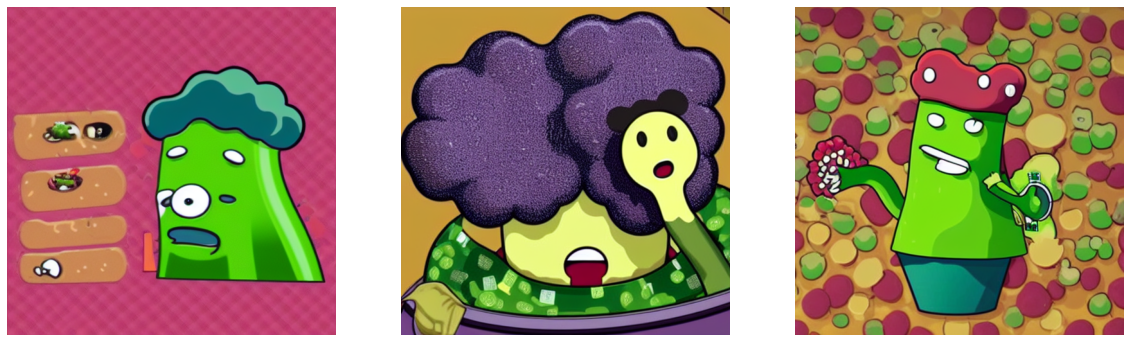

In [41]:
### generate some examples and plot them according to our new concept and prompts
### with the combined tokens
generated = stable_diffusion.text_to_image(
    prompt_combination, batch_size = number, num_steps = 25, seed = 2234
)
txt.plot_images(generated)

25/25 [==============================] - 60s 2s/step


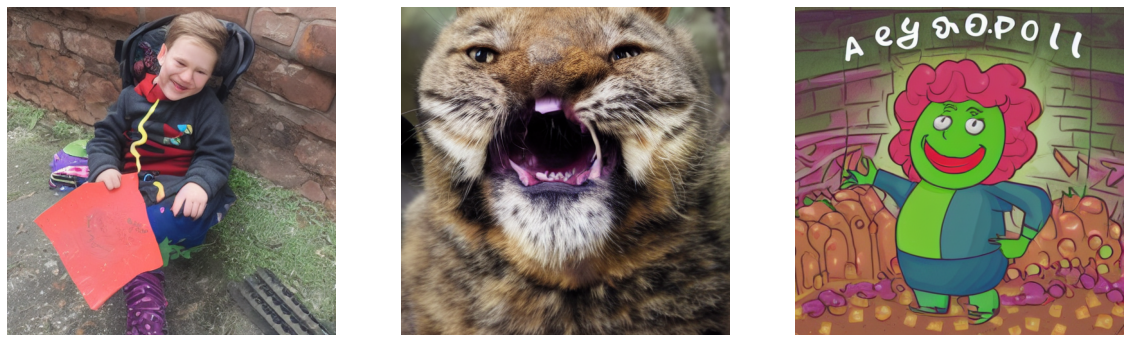

In [40]:
### generate some examples and plot them according to our new concept and prompts
### with token interpolation
generated = stable_diffusion.text_to_image(
    prompt_interpolation, batch_size = number, num_steps = 25, seed = 2234
)
txt.plot_images(generated)

In [ ]:
### generate images and save them directly in your Google Drive
### where to store your images, you may have to create the folder "Images" first
drive_folder = '/content/drive/MyDrive/Images/'

###choose whether you want to use the interpolation prompt or the combined prompt
txt.image_generation(prompt_interpolation, drive_folder, number)

25/25 [==============================] - 28s 1s/step
